<a href="https://colab.research.google.com/github/LeandroCoelhos/estudos_datascience/blob/main/Limpeza_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# DataFrame original com as colunas
df = pd.DataFrame({
    'ID': np.arange(1, 1001),
    'Idade': np.random.randint(18, 66, 1000),
    'Categoria': np.random.choice(['A', 'B', 'C', 'D'], 1000),
    'Renda': np.random.uniform(1000, 5000, 1000)
})

# Adicionar valores numéricos como strings e letras em algumas linhas
df.loc[3, 'Idade'] = 'Vinte'
df.loc[7, 'Categoria'] = 'E'
df.loc[15, 'Renda'] = 'Baixa'

# Exibir o DataFrame resultante
print(df)

       ID  Idade Categoria        Renda
0       1     50         C  2968.013083
1       2     28         A  2630.794466
2       3     45         D  2296.213896
3       4  Vinte         B  3409.393685
4       5     36         A  4020.039166
..    ...    ...       ...          ...
995   996     34         C  2329.303235
996   997     44         C  1869.128124
997   998     46         A  1066.316509
998   999     40         B  2222.020603
999  1000     48         D   3652.13811

[1000 rows x 4 columns]


In [ ]:
pd.get_dummies(df, columns=['Categoria'])

,ID,Idade,Renda,Categoria_A,Categoria_B,Categoria_C,Categoria_D,Categoria_E
0,1,50,2968.013083,0,0,1,0,0
1,2,28,2630.794466,1,0,0,0,0
2,3,45,2296.213896,0,0,0,1,0
3,4,Vinte,3409.393685,0,1,0,0,0
4,5,36,4020.039166,1,0,0,0,0
...,...,...,...,...,...,...,...,...
995,996,34,2329.303235,0,0,1,0,0
996,997,44,1869.128124,0,0,1,0,0
997,998,46,1066.316509,1,0,0,0,0
998,999,40,2222.020603,0,1,0,0,0


In [ ]:
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')

In [ ]:
df = df.fillna(df.mean())
df

<ipython-input-21-f383654e7baf>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


,ID,Idade,Categoria,Renda,NovaColuna,app
0,1,50.000000,C,2968.013083,1,0
1,2,28.000000,A,2630.794466,0,0
2,3,45.000000,D,2296.213896,0,0
3,4,42.012012,B,3409.393685,0,0
4,5,36.000000,A,4020.039166,0,0
...,...,...,...,...,...,...
995,996,34.000000,C,2329.303235,1,0
996,997,44.000000,C,1869.128124,0,0
997,998,46.000000,A,1066.316509,0,0
998,999,40.000000,B,2222.020603,1,0


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_sample = train_test_split(df, test_size=100, stratify=df['NovaColuna'], random_state=42)
df_train.shape,df_sample.shape

((900, 6), (100, 6))

In [ ]:
df['app'] = np.where(df['Renda'] == 2000, 1, 0)
df

,ID,Idade,Categoria,Renda,NovaColuna,app
0,1,50.000000,C,2968.013083,0,0
1,2,28.000000,A,2630.794466,0,0
2,3,45.000000,D,2296.213896,1,0
3,4,42.012012,B,3409.393685,1,0
4,5,36.000000,A,4020.039166,0,0
...,...,...,...,...,...,...
995,996,34.000000,C,2329.303235,0,0
996,997,44.000000,C,1869.128124,0,0
997,998,46.000000,A,1066.316509,0,0
998,999,40.000000,B,2222.020603,1,0


In [ ]:
df['Uniforme'] = np.random.uniform(0, 1, size=len(df))
df['Normal'] = np.random.normal(loc=0, scale=1, size=len(df))
df['Exponencial'] = np.random.exponential(scale=1, size=len(df))
df

,ID,Idade,Categoria,Renda,NovaColuna,app,Uniforme,Normal,Exponencial
0,1,50.000000,C,2968.013083,0,0,0.591066,-0.898221,0.410319
1,2,28.000000,A,2630.794466,0,0,0.162840,-0.320717,0.872689
2,3,45.000000,D,2296.213896,1,0,0.963474,0.433038,0.740777
3,4,42.012012,B,3409.393685,1,0,0.556866,-0.385006,0.810106
4,5,36.000000,A,4020.039166,0,0,0.444763,0.515182,1.306310
...,...,...,...,...,...,...,...,...,...
995,996,34.000000,C,2329.303235,0,0,0.717755,-0.651700,0.963672
996,997,44.000000,C,1869.128124,0,0,0.227734,0.966203,1.371208
997,998,46.000000,A,1066.316509,0,0,0.268508,0.179357,0.569487
998,999,40.000000,B,2222.020603,1,0,0.876965,-1.780186,0.416738


# Hierarquico


In [ ]:
X

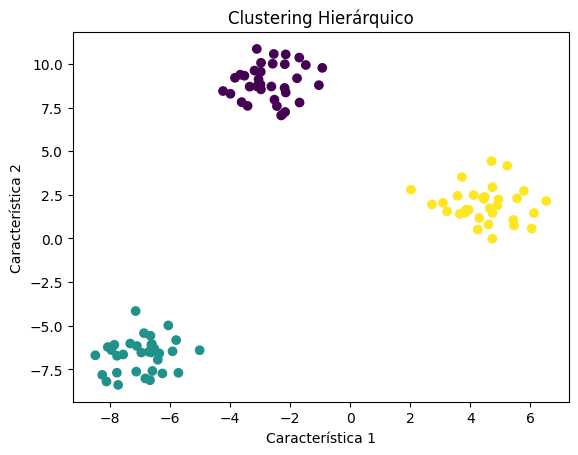

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Criar um conjunto de dados de exemplo
X, y = make_blobs(n_samples=100, centers=3, random_state=42)
n_clusters = 3
# Criar uma instância do algoritmo de clustering hierárquico
clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Realizar o clustering nos dados
labels = clustering.fit_predict(X)

# Plotar os resultados
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Clustering Hierárquico")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Silhueta

<ipython-input-6-d41853cc6266>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(i / n_clusters)


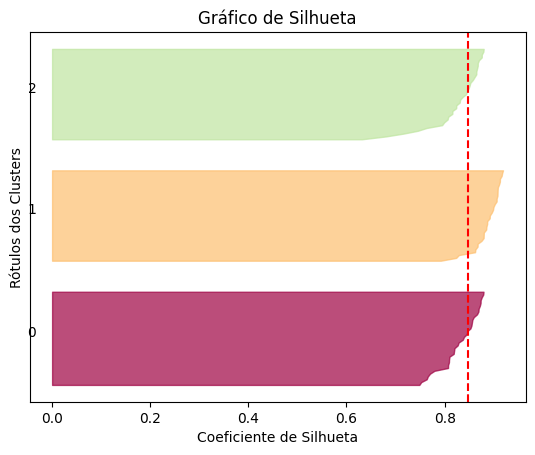

In [6]:
# Calcular o coeficiente de silhueta para cada amostra
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

# Plotar o coeficiente de silhueta
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.get_cmap("Spectral")(i / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_xlabel("Coeficiente de Silhueta")
ax.set_ylabel("Rótulos dos Clusters")
ax.set_title("Gráfico de Silhueta")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
plt.show()

# Joelho

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

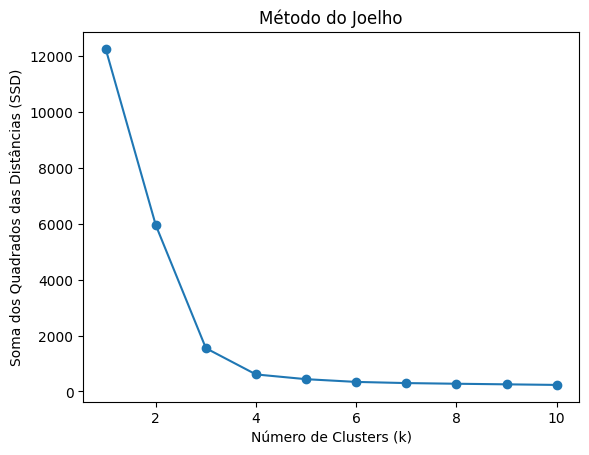

In [7]:

# Criar um conjunto de dados de exemplo
X, y = make_blobs(n_samples=200, centers=6, random_state=42)

# Definir uma lista para armazenar as somas dos quadrados das distâncias
ssd = []

# Testar diferentes valores de k
for k in range(1, 11):
    # Criar uma instância do algoritmo de clustering (K-means)
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    # Armazenar a soma dos quadrados das distâncias
    ssd.append(clustering.inertia_)

# Plotar a curva do método do joelho
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados das Distâncias (SSD)')
plt.title('Método do Joelho')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

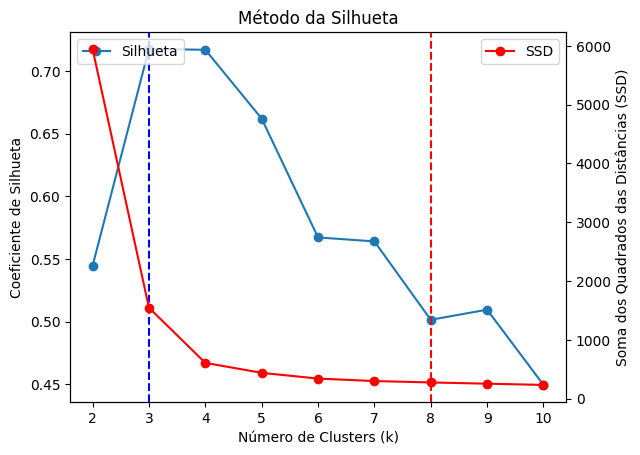

Melhor número de clusters baseado na Silhueta: 3
Coeficiente de Silhueta correspondente: 0.7175794379629798
Melhor número de clusters baseado no Método do Joelho: 8


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=200, centers=6, random_state=42)

def evaluate_clusters(X, max_clusters):
    # Lista para armazenar os valores de silhueta
    silhouette_scores = []
    # Lista para armazenar as somas dos quadrados das distâncias
    ssd = []

    for k in range(2, max_clusters + 1):
        # Criar uma instância do algoritmo de clustering (K-means)
        clustering = KMeans(n_clusters=k, random_state=42)
        clustering.fit(X)

        # Calcular o coeficiente de silhueta médio
        silhouette_avg = silhouette_score(X, clustering.labels_)
        silhouette_scores.append(silhouette_avg)

        # Armazenar a soma dos quadrados das distâncias
        ssd.append(clustering.inertia_)

    # Plotar a curva de silhueta
    fig, ax1 = plt.subplots()
    ax1.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', label='Silhueta')
    ax1.set_xlabel('Número de Clusters (k)')
    ax1.set_ylabel('Coeficiente de Silhueta')
    ax1.set_title('Método da Silhueta')

    # Plotar a curva do método do joelho
    ax2 = ax1.twinx()
    ax2.plot(range(2, max_clusters + 1), ssd, marker='o', color='r', label='SSD')
    ax2.set_ylabel('Soma dos Quadrados das Distâncias (SSD)')

    # Encontrar o ponto de máximo coeficiente de silhueta
    best_silhouette_idx = np.argmax(silhouette_scores) + 2
    best_silhouette = silhouette_scores[best_silhouette_idx - 2]

    # Encontrar o ponto de joelho na curva SSD
    diff = np.diff(ssd)
    best_knee_idx = np.argmax(diff) + 2

    # Plotar as linhas verticais para indicar os melhores pontos
    ax1.axvline(x=best_silhouette_idx, linestyle='--', color='b')
    ax2.axvline(x=best_knee_idx, linestyle='--', color='r')

    # Adicionar legendas
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

    return best_silhouette_idx, best_silhouette, best_knee_idx

# Exemplo de uso
 # Seus dados
max_clusters = 10  # Número máximo de clusters a serem avaliados

best_silhouette_idx, best_silhouette, best_knee_idx = evaluate_clusters(X, max_clusters)

print(f"Melhor número de clusters baseado na Silhueta: {best_silhouette_idx}")
print(f"Coeficiente de Silhueta correspondente: {best_silhouette}")
print(f"Melhor número de clusters baseado no Método do Joelho: {best_knee_idx}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

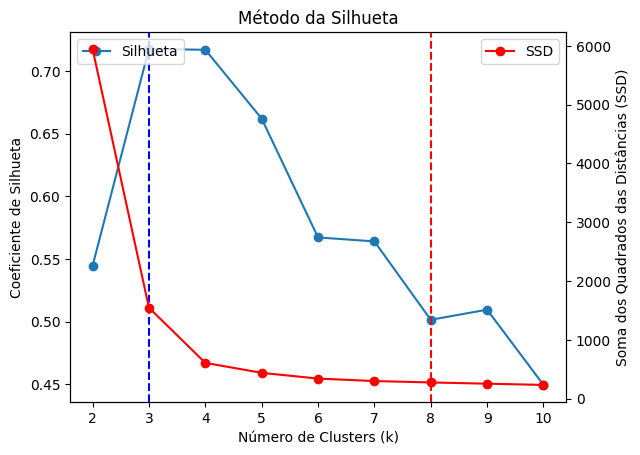

Melhor número de clusters baseado na Silhueta: 3
Coeficiente de Silhueta correspondente: 0.7175794379629798
Melhor número de clusters baseado no Método do Joelho: 8


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=200, centers=6, random_state=42)

def evaluate_clusters(X, max_clusters):
    # Lista para armazenar os valores de silhueta
    silhouette_scores = []
    # Lista para armazenar as somas dos quadrados das distâncias
    ssd = []

    for k in range(2, max_clusters + 1):
        # Criar uma instância do algoritmo de clustering (K-means)
        clustering = KMeans(n_clusters=k, random_state=42)
        clustering.fit(X)

        # Calcular o coeficiente de silhueta médio
        silhouette_avg = silhouette_score(X, clustering.labels_)
        silhouette_scores.append(silhouette_avg)

        # Armazenar a soma dos quadrados das distâncias
        ssd.append(clustering.inertia_)

    # Plotar a curva de silhueta
    fig, ax1 = plt.subplots()
    ax1.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', label='Silhueta')
    ax1.set_xlabel('Número de Clusters (k)')
    ax1.set_ylabel('Coeficiente de Silhueta')
    ax1.set_title('Método da Silhueta')

    # Plotar a curva do método do joelho
    ax2 = ax1.twinx()
    ax2.plot(range(2, max_clusters + 1), ssd, marker='o', color='r', label='SSD')
    ax2.set_ylabel('Soma dos Quadrados das Distâncias (SSD)')

    # Encontrar o ponto de máximo coeficiente de silhueta
    best_silhouette_idx = np.argmax(silhouette_scores) + 2
    best_silhouette = silhouette_scores[best_silhouette_idx - 2]

    # Encontrar o ponto de joelho na curva SSD
    diff = np.diff(ssd)
    best_knee_idx = np.argmax(diff) + 2

    # Plotar as linhas verticais para indicar os melhores pontos
    ax1.axvline(x=best_silhouette_idx, linestyle='--', color='b')
    ax2.axvline(x=best_knee_idx, linestyle='--', color='r')

    # Adicionar legendas
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

    return best_silhouette_idx, best_silhouette, best_knee_idx

# Exemplo de uso
 # Substitua ... pela sua matriz de dados
max_clusters = 10  # Número máximo de clusters a serem avaliados

best_silhouette_idx, best_silhouette, best_knee_idx = evaluate_clusters(X, max_clusters)

print(f"Melhor número de clusters baseado na Silhueta: {best_silhouette_idx}")
print(f"Coeficiente de Silhueta correspondente: {best_silhouette}")
print(f"Melhor número de clusters baseado no Método do Joelho: {best_knee_idx}")
